In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-07-08 18:57:27.036351: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data = data.drop(['Unnamed: 32','id'],axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data['diagnosis'] = np.where(data['diagnosis']=='M',1,0)

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
x=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [35]:
x_train.shape

(483, 30)

In [36]:
x_test.shape

(86, 30)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations

In [38]:
model = Sequential()
model.add(Dense(units=9,activation='relu',input_dim=30))
model.add(Dense(units=9,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 279       
                                                                 
 dense_4 (Dense)             (None, 9)                 90        
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
hist = model.fit(x_train,y_train,validation_split=0.15,batch_size=50,epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 31ms/step - loss: 0.7552 - accuracy: 0.3585 - val_loss: 0.7591 - val_accuracy: 0.3973
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 0.7080 - accuracy: 0.3585 - val_loss: 0.7162 - val_accuracy: 0.3973
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6708 - accuracy: 0.3659 - val_loss: 0.6820 - val_accuracy: 0.4110
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 0.6401 - accuracy: 0.4366 - val_loss: 0.6515 - val_accuracy: 0.4932
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6120 - accuracy: 0.6049 - val_loss: 0.6237 - val_accuracy: 0.5753
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5865 - accuracy: 0.6829 - val_loss: 0.5985 - val_accuracy: 0.6986
Epoch 7/100
9/9 [==============================] - 0s 13ms/step - loss: 0.5621 - accuracy: 0.7561 - val_loss: 0.5734 - val_accuracy: 0.7534
Epoch 8/100
9/9 [======

9/9 [==============================] - 0s 7ms/step - loss: 0.0705 - accuracy: 0.9805 - val_loss: 0.0718 - val_accuracy: 0.9863
Epoch 60/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0691 - accuracy: 0.9805 - val_loss: 0.0711 - val_accuracy: 0.9863
Epoch 61/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0680 - accuracy: 0.9805 - val_loss: 0.0703 - val_accuracy: 0.9863
Epoch 62/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0671 - accuracy: 0.9829 - val_loss: 0.0698 - val_accuracy: 0.9863
Epoch 63/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0663 - accuracy: 0.9829 - val_loss: 0.0692 - val_accuracy: 0.9863
Epoch 64/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0654 - accuracy: 0.9829 - val_loss: 0.0681 - val_accuracy: 0.9863
Epoch 65/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0646 - accuracy: 0.9829 - val_loss: 0.0677 - val_accuracy: 0.9863
Epoch 66/100
9/9 [===============

In [42]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
y_pred=model.predict(x_test)
y_pred=(y_pred >= 0.5)

3/3 [==============================] - 0s 3ms/step


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_pred,y_test)
cm

array([[48,  2],
       [ 0, 36]])

In [45]:
acc

0.9767441860465116

In [46]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

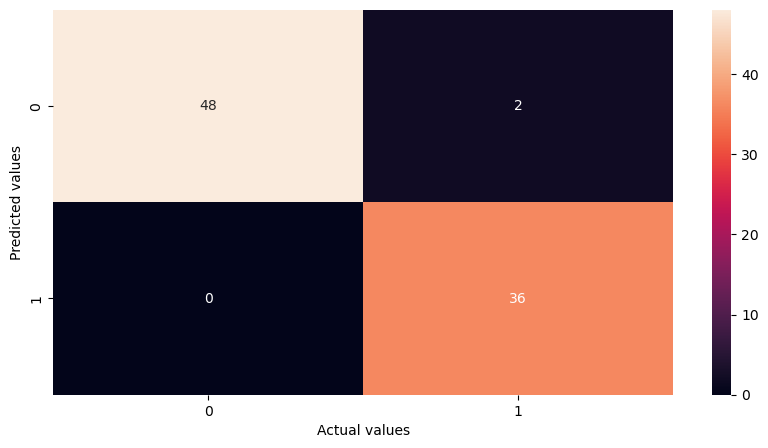

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show

3/3 [==============================] - 0s 4ms/step


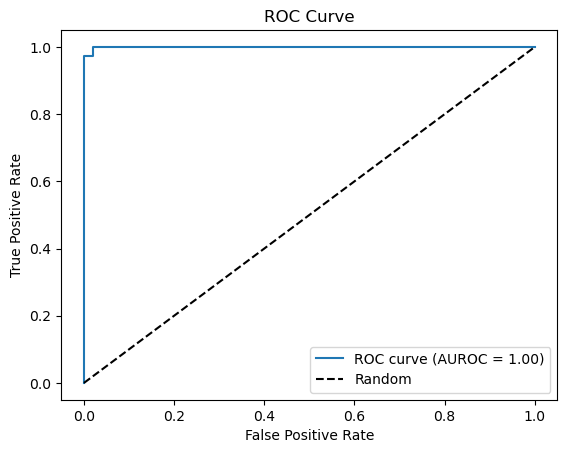

AUROC: 0.9994444444444445


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = model.predict(x_test)
y_pred = y_pred.ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auroc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC curve (AUROC = {:.2f})'.format(auroc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUROC:', auroc)

<function matplotlib.pyplot.show(close=None, block=None)>

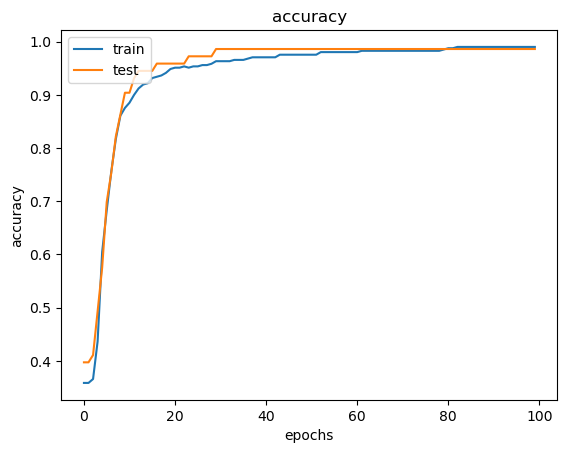

In [49]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

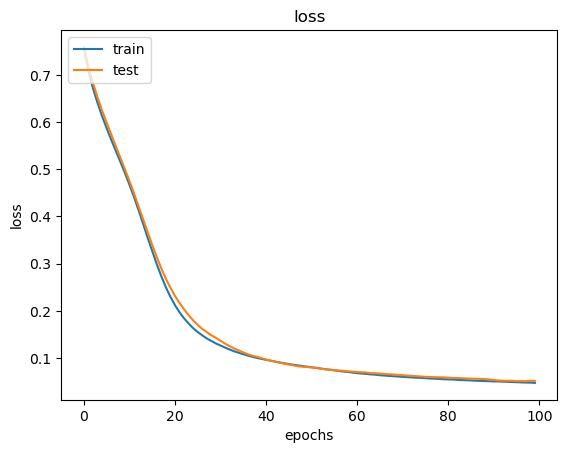

In [50]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show